### 얼굴 영역 자르기

In [15]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

얼굴 이미지만 가져오는 함수 get_gropped_face

In [16]:
def get_gropped_face(image_file):
  image = face_recognition.load_image_file(image_file)
  face_locations = face_recognition.face_locations(image)

  a, b, c, d = face_locations[0]
  cropped_face = image[a:c,d:b,:]

  # plt.imshow(cropped_face)
    
  return cropped_face

디렉토리 내의 파일 목록을 읽어서 저장 (반복문 사용 위함)

In [17]:
path_dir = os.getenv('HOME')+'/aiffel/face_embedding/images'
save_dir = os.getenv('HOME')+'/aiffel/face_embedding/images_cropped/'
file_list = os.listdir(path_dir)

In [18]:
for i in file_list:
    print(i)
    image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/' + i
    face = get_gropped_face(image_path)
    pillow_image = Image.fromarray(face)
    pillow_image.save(save_dir+i)

박보영.jpg
잭 블랙.jpeg
케빈 스페이시.jpeg
박완규.png
이근대위.jpeg
카이.jpg
곽도원.jpg
온앤오프와이엇.jpg
박진영.jpg
로제.jpg
윤종신.jpeg
이준혁.jpeg
백현.jpg
잇지예지.jpeg
오마이걸효정.jpeg
biden.jpg
신동엽.jpg
노홍철.jpeg
숀 코네리.jpg
조인성.jpg
이연걸.jpeg
유희열.jpeg
오마이걸미미.jpeg
박항서.jpg
우기.jpg
유아.jpg
철면수심.jpg
김광현.jpg
장성호.jpeg
승희.jpeg
송중기.jpeg
김영삼.jpeg
이승철.jpeg
트와이스다현.jpeg
켄 정.jpeg
안재홍.jpg
me2.jpg
박진영.jpeg
obama.jpg
장동건.jpeg
강미나.jpg
이정재.jpeg
신태용.jpg
하정우.jpg
대도서관.jpeg
제이크 질렌할.jpeg
이승기.jpeg
서현진.jpg
me1.jpg
길.jpg
수호.jpg
류승룡.jpeg
이말년.png
드웨인 존슨.jpg
트와이스미나.jpg
온앤오프효진.jpg
황정민.jpg
슈퍼비.jpeg
지민(BTS).jpg
류준열.jpg
봉준호.jpg
로저 무어.jpeg
고창석.jpeg
찬열.jpeg
박희순.jpg
김구라.jpg
정준하.jpg
이천수.jpg
사쿠라.jpg
이용진.jpg
정민철.jpg
수지.jpg
이대형.jpg
매드클라운.jpeg
김대명.jpeg
세훈.jpg
무라니시.png
이광수.jpg
강동원.jpg
박건우.png
아놀드 슈워제네거.jpg
존 파브르.jpeg
최양락.jpg
트와이스쯔위.jpg
씨잼.jpg
지드래곤.jpeg
지디.jpg
홍구.jpg
제이홉.jpg
화사.jpg
이제훈.jpeg
사무엘 L 잭슨.jpg
나인뮤지스경리.jpg
박보검.jpg
윤도현.png
차두리.jpeg
bush.jpeg
저스틴 존슨.jpeg
브래들리 쿠퍼.jpg
RM.jpg
하승진.jpg
잭 니콜슨.jpeg
이진호.jpeg
마동석.jpeg
주진모(올드).jpg
문재인.jpeg
시우민.jpg
도지한.jpg
슈가.jpg
첸.jpg
앤드류 응.png
조원희.

### 모은 연예인들과 비교하기

In [19]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [20]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0: 
          embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [21]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [22]:
embedding_dict = get_face_embedding_dict(path_dir)
embedding_dict['me1']

array([-8.50986689e-02,  1.18850760e-01,  1.54181384e-03, -6.76471666e-02,
       -2.13695005e-01, -4.31106612e-02, -5.28945588e-02, -7.27443621e-02,
        1.07735842e-01, -1.33865073e-01,  1.74495444e-01, -9.42279249e-02,
       -2.40262032e-01, -2.31311787e-02, -5.59987724e-02,  2.23724738e-01,
       -1.43257454e-01, -2.33271345e-01, -5.51669337e-02, -7.30293849e-03,
        8.65254998e-02,  3.61652337e-02, -1.45579828e-03,  2.70015318e-02,
       -1.74582079e-01, -2.99614906e-01, -5.17133512e-02, -4.89282459e-02,
       -2.11742781e-02, -8.44201744e-02, -2.12022103e-04,  9.66739282e-02,
       -2.01116189e-01, -1.15832593e-02,  8.04464072e-02,  1.15032524e-01,
       -1.04419980e-02, -6.65974468e-02,  1.59162819e-01, -1.94081701e-02,
       -3.50237250e-01,  9.04845819e-03,  8.71530622e-02,  2.70912439e-01,
        1.17680974e-01,  2.24774843e-03,  8.29979964e-03, -1.36124089e-01,
        8.75518695e-02, -1.77843720e-01,  3.81012857e-02,  1.70865938e-01,
       -1.54459756e-03,  

In [23]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [24]:
result = []
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)   
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top + 1):
      if i == 0 :
        continue
      if sorted_faces[i]:
        print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        result.append('/'+sorted_faces[i][0]+'.jpg')
        #plt.imshow(i)

In [25]:
get_nearest_face('me1')

순위 1 : 이름(우기), 거리(0.38866527374068954)
순위 2 : 이름(강미나), 거리(0.39973416876841905)
순위 3 : 이름(me2), 거리(0.40054826472119764)
순위 4 : 이름(온앤오프라운), 거리(0.4029223348395055)
순위 5 : 이름(아이즈원조유리), 거리(0.4222266516378893)


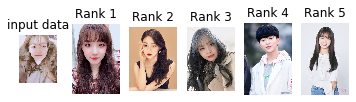

In [26]:
import cv2

fileName = path_dir + '/me1.jpg'
fig = plt.figure()
rows = 1
cols = 6

img1 = cv2.imread(fileName)
img2 = cv2.imread(path_dir + result[0])
img3 = cv2.imread(path_dir + result[1])
img4 = cv2.imread(path_dir + result[2])
img5 = cv2.imread(path_dir + result[3])
img6 = cv2.imread(path_dir + result[4])
 
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title('input data')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title('Rank 1')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax3.set_title('Rank 2')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax4.set_title('Rank 3')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
ax5.set_title('Rank 4')
ax5.axis("off")

ax6 = fig.add_subplot(rows, cols, 6)
ax6.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
ax6.set_title('Rank 5')
ax6.axis("off")
plt.show()
